In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# baseline_model
- original data

In [4]:
#models
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#cv
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)
#mse
from sklearn.metrics import mean_squared_error as mse

## models

In [5]:
lgb = LGBMRegressor()
xgb = XGBRegressor()
rf = RandomForestRegressor()

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## cv

In [23]:
#train data cv
for i, (idx_train, idx_cv) in enumerate(cv.split(train)):
    df_train = train.iloc[idx_train]
    df_cv = train.iloc[idx_cv]
    
    x_train = df_train.drop(['price','id','date'], axis=1)
    y_train = df_train['price']
    x_cv = df_cv.drop(['price','id','date'], axis=1)
    y_cv = df_cv['price']
    
    print('[K =',i,']')
    
    print('<lgb>')
    lgb.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, lgb.predict(x_train))),
                                                np.sqrt(mse(y_cv, lgb.predict(x_cv)))) )
    print('<xgb>')
    xgb.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, xgb.predict(x_train))),
                                                np.sqrt(mse(y_cv, xgb.predict(x_cv)))) )
    print('<rf>')
    rf.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, rf.predict(x_train))),
                                                np.sqrt(mse(y_cv, rf.predict(x_cv)))) )

[K = 0 ]
<lgb>
train rmse = 83044.657378767, cv rmse = 130610.25214137646
<xgb>
train rmse = 114152.52949062479, cv rmse = 145346.46344708913
<rf>
train rmse = 60421.77394767747, cv rmse = 147473.64249790806
[K = 1 ]
<lgb>
train rmse = 85958.41592234666, cv rmse = 124540.47332799023
<xgb>
train rmse = 111637.6008043531, cv rmse = 136988.9528353131
<rf>
train rmse = 62938.16665008253, cv rmse = 142354.74236064777
[K = 2 ]
<lgb>
train rmse = 88268.79426692182, cv rmse = 111535.54619914056
<xgb>
train rmse = 114239.04741278247, cv rmse = 128288.03396857729
<rf>
train rmse = 61882.26177829107, cv rmse = 146889.1494059129
[K = 3 ]
<lgb>
train rmse = 81099.55193654148, cv rmse = 143204.88912336438
<xgb>
train rmse = 111408.14534547333, cv rmse = 147255.98004644827
<rf>
train rmse = 57852.0889260127, cv rmse = 151263.72091744666
[K = 4 ]
<lgb>
train rmse = 86417.28199958829, cv rmse = 118652.22766446463
<xgb>
train rmse = 113951.15552531635, cv rmse = 134950.9518736607
<rf>
train rmse = 59775

## lgb_sub

In [7]:
x_train = train.drop(['price','id','date'], axis=1)
y_train = train['price']
x_test = test.drop(['id','date'], axis=1)

In [8]:
lgb.fit(x_train, y_train)
lgb_pred = lgb.predict(x_test)

xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

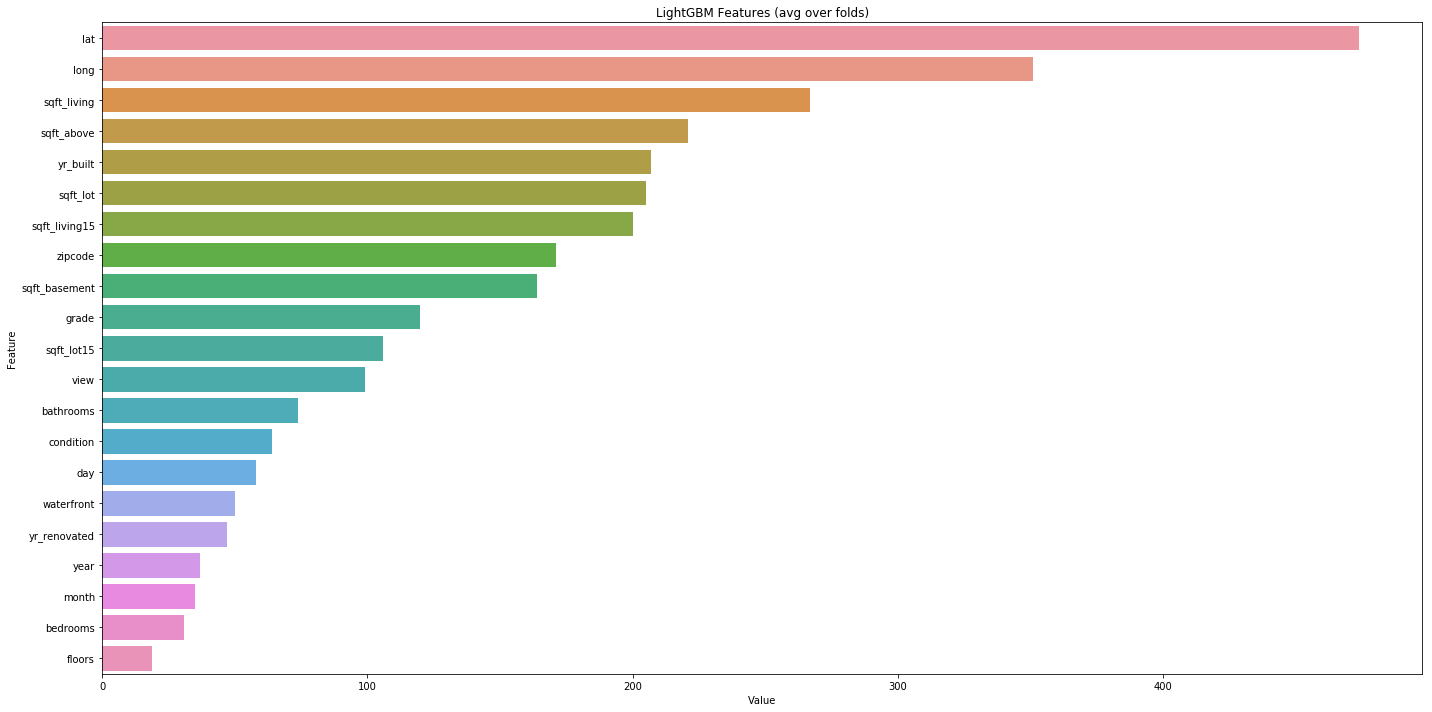

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [42]:
lgb_sub = pd.DataFrame({'id' : test.id, 'price' : lgb_pred})
#lgb_sub.to_csv('../sub/190311_lgb_base.csv', index = False) - 97477.86490

## ensemble_sub(xgb,lgb,rf 평균)

In [44]:
esb_pred = (lgb_pred+xgb_pred+rf_pred)/3
esb_sub = pd.DataFrame({'id' : test.id, 'price' : esb_pred})
#esb_sub.to_csv('../sub/190311_ensemble_base.csv', index = False) - 99665.60234